In [3]:
#import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#train and test data
df_test = pd.read_csv(r'D:\ad\tutorials\Data-analys\works\analytics_vidya_loanprediction\test_lAUu6dG.csv')
df_train = pd.read_csv(r'D:\ad\tutorials\Data-analys\works\analytics_vidya_loanprediction\train_ctrUa4K.csv')
df_train.Loan_Status=df_train.Loan_Status.map({'Y':1,'N':0})
df_train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [4]:
print(df_train.head())

    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area  Loan_Status  
0             1.0         Urban            1  
1             1.0         Rural            0  
2             1.0

In [5]:
print(df_test.head())

    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001015   Male     Yes          0      Graduate            No   
1  LP001022   Male     Yes          1      Graduate            No   
2  LP001031   Male     Yes          2      Graduate            No   
3  LP001035   Male     Yes          2      Graduate            No   
4  LP001051   Male      No          0  Not Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5720                  0       110.0             360.0   
1             3076               1500       126.0             360.0   
2             5000               1800       208.0             360.0   
3             2340               2546       100.0             360.0   
4             3276                  0        78.0             360.0   

   Credit_History Property_Area  
0             1.0         Urban  
1             1.0         Urban  
2             1.0         Urban  
3             NaN     

In [7]:
#will check for missing values in the dataset using ISNULL 
df_train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [8]:
df_test.columns





Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [10]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 62.5+ KB


C:\Users\ad-jma\AppData\Local\Temp\ipykernel_12548\457645690.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat=df_train.corr()


<Axes: >

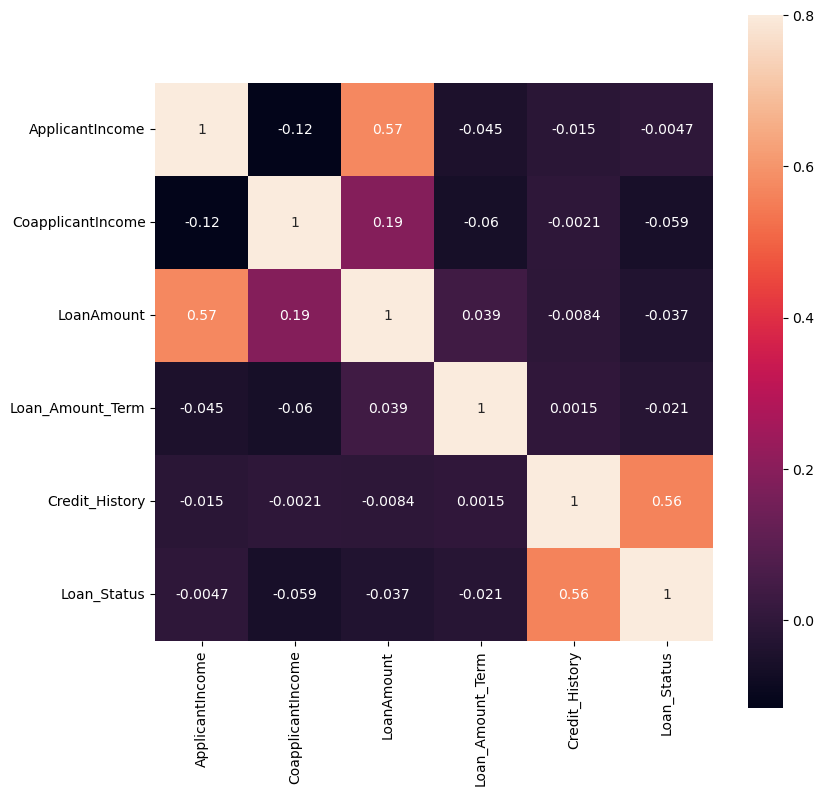

In [28]:
#graphical representation of test data using heat map
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
corrmat=df_train.corr()
f,ax=plt.subplots(figsize=(9,9))
sns.heatmap(corrmat,vmax=.8,square=True,annot=True)

In [13]:
df_train.shape

(614, 13)

In [14]:
df_test.shape

(367, 12)

In [19]:

#univariate analysis
loan_status_count=df_train['Loan_Status'].value_counts()

df_train['Loan_Status'].value_counts(normalize=True)

1    0.687296
0    0.312704
Name: Loan_Status, dtype: float64

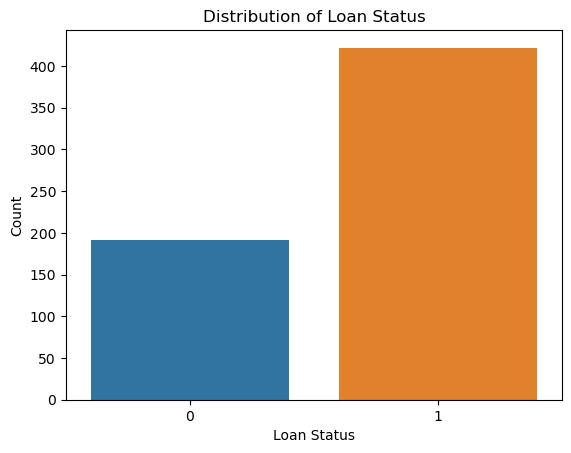

In [20]:
#barplot showing the Loan status and count relation
sns.barplot(x=loan_status_count.index,y=loan_status_count.values)
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.title('Distribution of Loan Status')
plt.show()

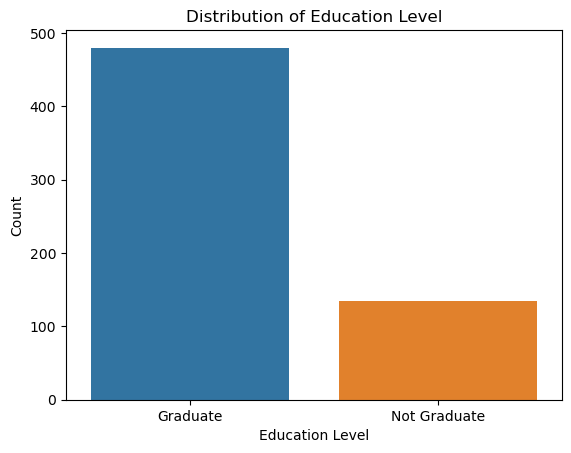

In [22]:
#categorical variable
sns.countplot(x='Education', data=df_train)#independent variable
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.title('Distribution of Education Level')
plt.show()

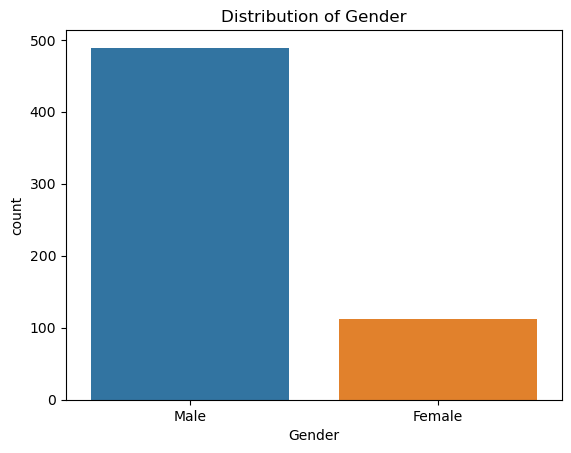

In [23]:
sns.countplot(x='Gender', data=df_train)
plt.xlabel('Gender')
plt.ylabel('count')
plt.title('Distribution of Gender')
plt.show()

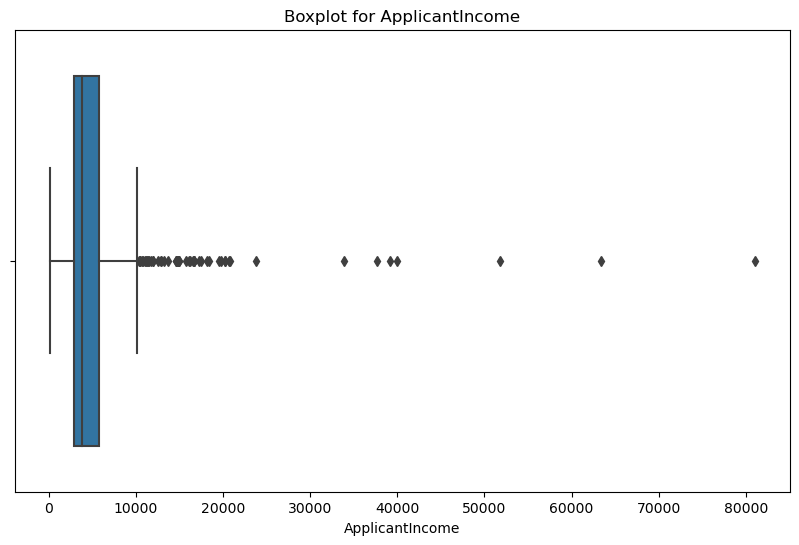

In [24]:
#numerical variable
plt.figure(figsize=(10,6))
sns.boxplot(x='ApplicantIncome',data=df_train)
plt.title('Boxplot for ApplicantIncome')
plt.show()


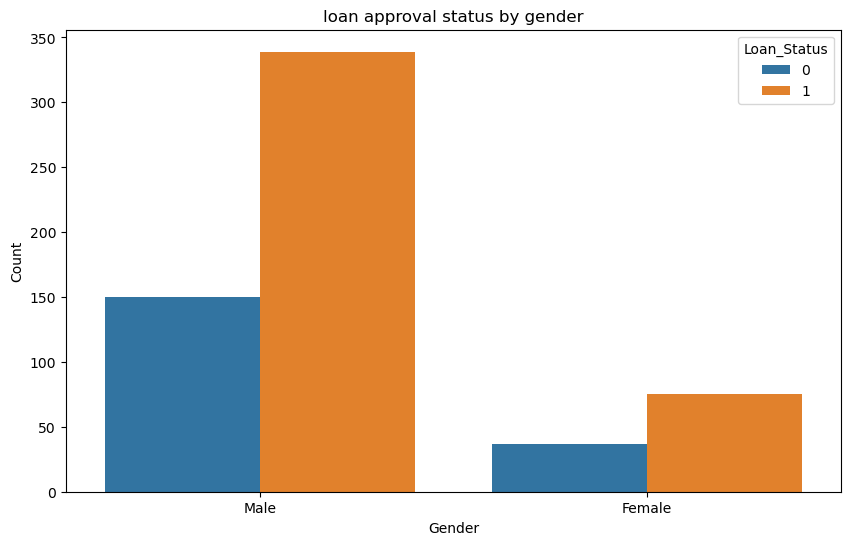

In [25]:


#categorical independent variable vs target variable

plt.figure(figsize=(10,6))
sns.countplot(x='Gender',hue='Loan_Status',data=df_train)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('loan approval status by gender')
plt.show()



<Figure size 1000x600 with 0 Axes>

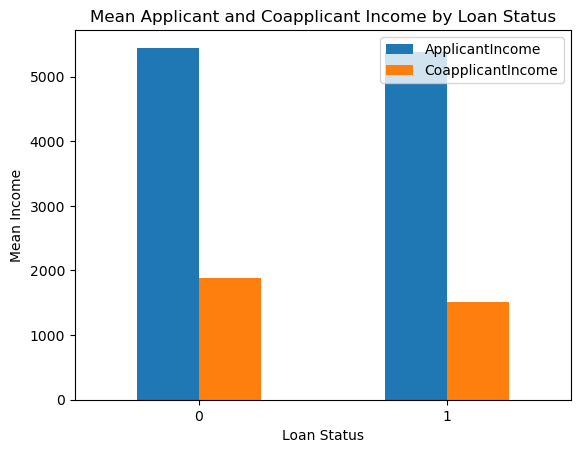

In [26]:
#numerical independent variable vs target variable
# Group the data by 'Loan_Status' and calculate mean for 'ApplicantIncome' and 'CoapplicantIncome'
grouped_data = df_train.groupby('Loan_Status')[['ApplicantIncome', 'CoapplicantIncome']].mean()

# Create a grouped bar plot
plt.figure(figsize=(10, 6))
grouped_data.plot(kind='bar', rot=0)
plt.xlabel('Loan Status')
plt.ylabel('Mean Income')
plt.title('Mean Applicant and Coapplicant Income by Loan Status')
plt.show()


In [29]:
df_train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [31]:


df_train['Gender'].fillna(df_train['Gender'].mode()[0], inplace=True)
df_train['Married'].fillna(df_train['Married'].mode()[0], inplace=True)
df_train['Dependents'].fillna(df_train['Dependents'].mode()[0], inplace=True)
df_train['Self_Employed'].fillna(df_train['Self_Employed'].mode()[0], inplace=True)
df_train['Credit_History'].fillna(df_train['Credit_History'].mode()[0], inplace=True)





In [35]:


# Remove non-numeric characters and convert to float
df_train['Dependents'] = df_train['Dependents'].replace({'\+': ''}, regex=True).astype(float)



In [34]:
df_train['LoanAmount'].fillna(df_train['LoanAmount'].mean(),inplace=True)
df_train['Loan_Amount_Term'].fillna(df_train['Loan_Amount_Term'].mean(),inplace=True)

In [36]:
df_train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,1
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0.0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,1
610,LP002979,Male,Yes,3.0,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,1
611,LP002983,Male,Yes,1.0,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,1
612,LP002984,Male,Yes,2.0,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,1


In [37]:

df_test

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


In [38]:

df_test.isnull().sum()


Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [39]:

df_test['Dependents'].fillna(df_test['Dependents'].mode()[0], inplace=True)

In [41]:
df_test['Credit_History'].fillna(df_test['Credit_History'].mode()[0], inplace=True)

In [40]:


df_test['Gender'].fillna(df_test['Gender'].mode()[0], inplace=True)



In [42]:
df_test['Self_Employed'].fillna(df_test['Self_Employed'].mode()[0], inplace=True)

In [43]:
df_test['LoanAmount'].fillna(df_test['LoanAmount'].mean(),inplace=True)
df_test['Loan_Amount_Term'].fillna(df_test['Loan_Amount_Term'].mean(),inplace=True)



In [44]:
df_test.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [45]:

df_train=df_train.drop('Loan_ID',axis=1)



In [46]:
df_test=df_test.drop('Loan_ID',axis=1)



In [47]:
# Remove non-numeric characters and convert to float
df_test['Dependents'] = df_test['Dependents'].replace({'\+': ''}, regex=True).astype(float)

In [48]:
df_test

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,Yes,0.0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,Male,Yes,1.0,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,Male,Yes,2.0,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,Male,Yes,2.0,Graduate,No,2340,2546,100.0,360.0,1.0,Urban
4,Male,No,0.0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...
362,Male,Yes,3.0,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,Male,Yes,0.0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,Male,No,0.0,Graduate,No,3250,1993,126.0,360.0,1.0,Semiurban
365,Male,Yes,0.0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


In [49]:
df_train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0.0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,1
1,Male,Yes,1.0,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,0
2,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,1
3,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,1
4,Male,No,0.0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,1


In [57]:
df_train=pd.get_dummies(df_train,columns=['Gender','Education','Self_Employed','Property_Area','Married'])


KeyError: "None of [Index(['Gender', 'Education', 'Self_Employed', 'Property_Area', 'Married'], dtype='object')] are in the [columns]"

In [58]:
df_test=pd.get_dummies(df_test,columns=['Gender','Education','Self_Employed','Property_Area','Married'])

KeyError: "None of [Index(['Gender', 'Education', 'Self_Employed', 'Property_Area', 'Married'], dtype='object')] are in the [columns]"

In [60]:
#splitting the dataset
X=df_train.drop('Loan_Status',axis=1)
y=df_train.Loan_Status

In [62]:
from sklearn.model_selection import train_test_split

In [63]:

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)



In [64]:
#creating model
#Logistic regression
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()


model=lr.fit(X,y)
model



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [66]:
#predictions

y_pred=model.predict(X_test)

from sklearn.metrics import accuracy_score


In [67]:
accuracy = accuracy_score(y_test, y_pred)*100
print('Accuracy of our model is equal ' + str(round(accuracy, 2)) + ' %.')

Accuracy of our model is equal 78.86 %.


In [68]:

#PREDICTIONS ARE 79% ACCURATE


In [69]:
#Decision tree classifier

from sklearn.tree import DecisionTreeClassifier

clf=DecisionTreeClassifier(criterion='entropy',max_depth=3)
clf=clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)*100
print('Accuracy of our model is equal ' + str(round(accuracy, 2)) + ' %.')





Accuracy of our model is equal 78.86 %.


In [73]:
#SO  IDENTIFIED 80% OF LOAN STATUS CORRECTLY

#lets make prediction for test dataset

pred_test=model.predict(df_test)



#lets import submission file which we have to submit on the solution checker
submission=pd.read_csv(r"D:\ad\tutorials\Data-analys\works\analytics_vidya_loanprediction\sample_submission_49d68Cx.csv")
submission


,Loan_ID,Loan_Status
0,LP001015,N
1,LP001022,N
2,LP001031,N
3,LP001035,N
4,LP001051,N
...,...,...
362,LP002971,N
363,LP002975,N
364,LP002980,N
365,LP002986,N


In [74]:


test=pd.read_csv(r"D:\ad\tutorials\Data-analys\works\analytics_vidya_loanprediction\test_lAUu6dG.csv")
test



,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


In [75]:


submission['Loan_Status']=pred_test 
submission['Loan_ID']=test['Loan_ID']



In [78]:
#we need predictions in Y and N ,so lets convert 1 and 0 to Y and N


submission['Loan_Status'].replace(0, 'N',inplace=True) 
submission['Loan_Status'].replace(1, 'Y',inplace=True)



In [81]:
#converting the submission file to .csv file



pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('Output_pred.csv')
pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv(r'D:\ad\tutorials\Data-analys\works\analytics_vidya_loanprediction\output_pred.csv',index=False)

